# Data Loading

Tahap ini merupakan tahap import dataset dan library yang dibutuhkan. Disini saya menggunakan dataset yang langsung diimport melalui Kaggle. Sebelumnya pastikan sudah mendownload `kaggle.json` (Kaggle API berupa token).

1. Install library kaggle


In [1]:
# ! pip install kaggle

2. Buat sebuah direktori bernama `.kaggle`
3. Copy `kaggle.json` ke direktori
4. Lakukan permission terhadap file


In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

5. Download dataset



In [3]:
! kaggle datasets download uciml/mushroom-classification

  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 50.5MB/s]


6. Unzip dataset

In [4]:
! unzip mushroom-classification.zip

Archive:  mushroom-classification.zip
  inflating: mushrooms.csv           


7. Import library yang dibutuhkan

In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

8. Baca data

In [6]:
pd.set_option('display.max_columns', None) # Untuk memperlihatkan seluruh kolom

In [38]:
mushrooms = pd.read_csv('/content/mushrooms.csv')
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


## Detail Atribut


Kelas Target:

1. Class : kolom yang menentukan apakah jamur beracun (p)  atau dapat dimakan (e)

Kelas Feature:
1. cap-shape (bentuk topi jamur)
  - bell:b (lonceng)
  - conical:c (kerucut)
  - convex:c (cembung)
  - flat:f (datar)
  - sunken:s (cekung)


2. cap-surface (bentuk permukaan topi jamur)
  - fibrous=f (berserat)
  - grooves=g (beralur)
  - scaly=y (bersisik)
  - smooth=s (halus)


3. cap-color (warna bentuk topi)
  - brown=n (coklat)
  - buff=b (kekuning-kuningan)
  - cinnamon=c (coklat kayu manis)
  - gray=g (abu-abu)
  - green=r (hijau)
  - pink=p (pink)
  - purple=u (ungu)
  - red=e (merah)
  - white=w (putih)
  - yellow=y	 (kuning)


4. bruises (memar)
  - bruises=t (benar)
  - no=f (tidak)


5. odor (bau)
  - almond=a (almond)
  - anise=l (manis)
  - creosote=c (minyak kreosot)
  - fishy=y (amis)
  - foul=f (busuk)
  - musty=m (apak)
  - none=n (tidak bau)
  - pungent=p (tajam/menusuk)
  - spicy=s (pedas)


6.gill-attachment (ikatan bilah)
  - attached=a (terikat)
  - free=f (bebas)


7. gill-spacing (jarak bilah)
  - close=c (dekat)
  - crowded=w (ramai)


8. gill-size (ukuran bilah)
  - broad=b (lebar)
  - narrow=n (lurus)


9. gill-color (warna bilah)
  - black=k (hitam)
  - brown=n (cokelat muda)
  - buff=b (kekuning-kuningan)
  - chocolate=h (cokelat)
  - gray=g (abu-abu)
  - green=r (hijau)
  - orange=o (oranye)
  - pink=p (pink)
  - purple=u (ungu)
  - red=e (merah)
  - white=w (putih)
  - yellow=y (kuning)


10. stalk-shape (ukuran tangkai)
  - enlarging=e (memperbesar)
  - tapering=t (meruncing)


11. stalk-root (akar tangkai)
  - bulbous=b (bulat)
  - club=c (klub)
  - cup=u (cangkir)
  - equal=e (sama)
  - rhizomorphs=z
  - rooted=r (berakar)
  - missing=? (tidak ada)


12. stalk-surface-above-ring (permukaan tangkai di atas cincin jamur)
  - fibrous=f (berserta)
  - scaly=y (bersisik)
  - silky=k (halus)
  - smooth=s (halus)


12. stalk-surface-below-ring (permukaan tangkai di bawah cincin jamur)
  - fibrous=f (berserta)
  - scaly=y (bersisik)
  - silky=k (halus)
  - smooth=s (halus)


13. stalk-color-above-ring (warna tangkai di atas cincin jamur)
  - brown=n (coklat)
  - buff=b (kekuning-kuningan)
  - cinnamon=c (coklat kayu manis)
  - gray=g (abu-abu)
  - green=r (hijau)
  - pink=p (pink)
  - purple=u (ungu)
  - red=e (merah)
  - white=w (putih)
  - yellow=y (kuning)


14. stalk-color-below-ring (warna tangkai di bawah cincin jamur)
  - brown=n (coklat)
  - buff=b (kekuning-kuningan)
  - cinnamon=c (coklat kayu manis)
  - gray=g (abu-abu)
  - green=r (hijau)
  - pink=p (pink)
  - purple=u (ungu)
  - red=e (merah)
  - white=w (putih)
  - yellow=y	 (kuning)


15. veil-type (tipe tudung jamur)
  - partial=p (parsial)
  - universal=u


16. veil-color (warna tudung jamur)
  - brown=n (cokelat)
  - orange=o (oranye)
  - white=w (putih)
  - yellow=y (kuning)


17. ring-number (jumlah cincin jamur)
  - none=n (tidak ada)
  - one=o (satu)
  - two=t (dua)


18. ring-type (tipe cincin jamur)
  - cobwebby=c (sarang laba-labar)
  - evanescent=e (gelombang)
  - flaring=f (terang)
  - large=l (lebar)
  - none=n (tidak ada)
  - pendant=p (liontin)
  - sheathing=s (pelapis)
  - zone=z (berupa daerah)


19. spore-print-color (warna spora)
  - black=k (hitam)
  - brown=n (cokelat)
  - buff=b (kekuning-kuningan)
  - chocolate=h (cokelat)
  - green=r (hijau)
  - orange=o (oranye)
  - purple=u (ungu)
  - white=w (putih)
  - yellow=y (kuning)


20. population (populasi)
  - abundant=a (berlimpah)
  - clustered=c (berkelompok)
  - numerous=n (banyak)
  - scattered=s (tersebar)
  - several=v (beberapa)
  - solitary=y (tersendiri)


21. habitat
  - grasses=g (rumput-rumput)
  - leaves=l (daun-daun)
  - meadows=m (padang rumput)
  - paths=p (jalanan)
  - urban=u (perkotaan)
  - waste=w (sampah)
  - woods=d (hutan atau pepohonan)


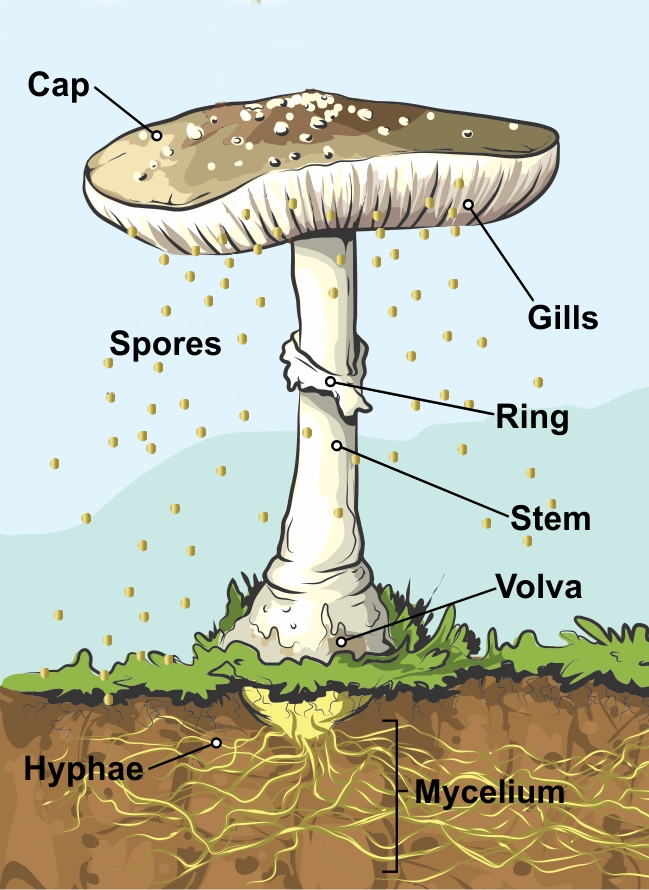

# EDA

Cek informasi kolom pada dataframe mushrooms

In [39]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Cek apakah kolom terdapat missing values

In [40]:
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Mengetahui statistik (count, unique, top, freq) dari kolom.  

In [41]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Periksa nilai unik dari setiap kolom

In [42]:
for value in mushrooms:
  print(value, mushrooms[value].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


Dalam dataset ini, kolom `class` sebagai variable target, dimana:
- p : jamur beracun (poisonous)
- e : jamur yang dapat dimakan (edible)

<Axes: xlabel='class', ylabel='Count'>

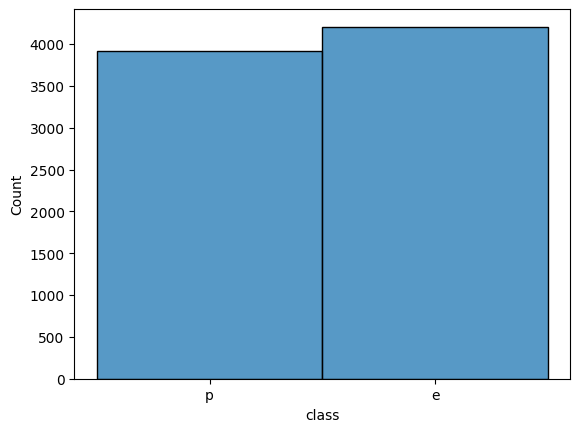

In [43]:
sns.histplot(mushrooms['class'])

In [44]:
mushrooms['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

# Feature Engineering

## Label Encoder

Label encoder merupakan teknik mengubah tipe data categorical menjadi numerical. Label ini memberikan nilai unik kepada setiap nilai kategorikal. Pada dataset mushroom, seluruh kolom bertipe object atau categorical. Agar dapat melakukan proses modelling maka seluruh kolom diubah menjadi data numerikal menggunakan `LabelEncoder()` dari sklearn.

Definisikan `LabelEncoder()` dalam sebuah variabel bernama `le`

In [45]:
le = LabelEncoder()

Lakukan LabelEncoder pada seluruh kolom. Gunakan perulangan terhadap kolom mushrooms

In [46]:
label_encoders = {}

for col in mushrooms.columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(mushrooms[col])
    mushrooms[col] = label_encoder.transform(mushrooms[col])
    label_encoders[col] = label_encoder

mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


Agar tidak bingung, perulangan dibawah untuk memperlihatkan nilai label encoder dengan value sebelum dilakukan label.

In [47]:
printed_values = set()
for col in mushrooms.columns:
    for value, encoded_label in enumerate(mushrooms[col]):
        original_value = label_encoders[col].inverse_transform([encoded_label])[0]
        if (original_value, encoded_label) not in printed_values:
            printed_values.add((original_value, encoded_label))
            print(f"{col}:{original_value} ===> {encoded_label}")

class:p ===> 1
class:e ===> 0
cap-shape:x ===> 5
cap-shape:b ===> 0
cap-shape:s ===> 4
cap-shape:f ===> 2
cap-shape:k ===> 3
cap-shape:c ===> 1
cap-surface:s ===> 2
cap-surface:y ===> 3
cap-surface:f ===> 0
cap-surface:g ===> 1
cap-color:n ===> 4
cap-color:y ===> 9
cap-color:w ===> 8
cap-color:g ===> 3
cap-color:e ===> 2
cap-color:p ===> 5
cap-color:u ===> 7
cap-color:r ===> 6
bruises:t ===> 1
odor:p ===> 6
odor:a ===> 0
odor:l ===> 3
odor:n ===> 5
odor:y ===> 8
odor:s ===> 7
odor:m ===> 4
gill-attachment:f ===> 1
gill-spacing:c ===> 0
gill-spacing:w ===> 1
gill-size:n ===> 1
gill-color:k ===> 4
gill-color:g ===> 2
gill-color:p ===> 7
gill-color:w ===> 10
gill-color:h ===> 3
gill-color:u ===> 9
gill-color:e ===> 1
gill-color:r ===> 8
gill-color:y ===> 11
gill-color:o ===> 6
stalk-root:e ===> 3
stalk-root:c ===> 2
stalk-root:b ===> 1
stalk-root:r ===> 4
stalk-root:? ===> 0
stalk-surface-above-ring:k ===> 1
stalk-color-above-ring:w ===> 7
stalk-color-above-ring:o ===> 5
veil-type:p ===> 

## Train-Test Split

Variable X sebagai feature dan variable y sebagai target

In [48]:
X = mushrooms.iloc[:, 1:]
y = mushrooms.iloc[:, 0]

Lakukan permisahan atau splitting untuk data train (80%) dan data test (20%) serta random_state sebesar 42

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Melihat ukuran data train dan test untuk memastikan data terpisah

In [50]:
X_train.shape, X_test.shape

((6499, 22), (1625, 22))

# Data Modelling

## Random Forest

Pada proyek kali ini saya menggunakan Random Forest sebagai model machine learning yang akan diuji.

In [51]:
rfc = RandomForestClassifier(max_depth=3)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

Prediksi data test

In [52]:
y_pred1 = rfc.predict(X_test)

## Neural Network

Saya juga menggunakan model deep learning neural network menggunakan arsitektur sebagai berikut.

1. Memiliki layer dense sebesar 16 unit dengan activation function relu (Rectified Linear Unit). Menggunakan relu untuk non-linearitas.
2. Memiliki layer dense sebesar 16 unit dengan activation function relu.
3. Memiliki layer output sebesar 1 unit dengan activation function sigmoid, karena hasil output berupa apakah jamur beracun dan dapat dimakan (binary classification).


In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_dim=X.shape[1], activation='relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

`model.summary()` untuk memperlihatkan ringkasan arsitektur, output shape, dan parameter dari model.

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                368       
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 657 (2.57 KB)
Trainable params: 657 (2.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Lakukan konfigurasi model menggunakan compile. Pada model ini:
- optimizer yang digunakan berupa `Adam`
- loss function `binary_crossentropy` untuk mengklasifikasikan masalah klasifikasi biner.
- Kemudian, untuk melihat berapa akurasinya gunakan `metrics=['accuracy']`



In [63]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Latih atau train model menggunakan:
- data train yang sudah displit
- iterasi epoch sebesar 5
- batch_size=32 dan
- validation data

In [64]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
204/204 [==============================] - 4s 11ms/step - loss: 0.5441 - accuracy: 0.7381 - val_loss: 0.3686 - val_accuracy: 0.8400
Epoch 2/5
204/204 [==============================] - 1s 6ms/step - loss: 0.2743 - accuracy: 0.8961 - val_loss: 0.2227 - val_accuracy: 0.9255
Epoch 3/5
204/204 [==============================] - 1s 3ms/step - loss: 0.1771 - accuracy: 0.9417 - val_loss: 0.1654 - val_accuracy: 0.9465
Epoch 4/5
204/204 [==============================] - 1s 3ms/step - loss: 0.1315 - accuracy: 0.9565 - val_loss: 0.1263 - val_accuracy: 0.9526
Epoch 5/5
204/204 [==============================] - 1s 3ms/step - loss: 0.0996 - accuracy: 0.9657 - val_loss: 0.1021 - val_accuracy: 0.9643


Hasilnya menunjukkan akurasi data train dengan validasi yang cukup tinggi.  
accuracy: 0.9985 - val_loss: 0.0085 - val_accuracy: 0.9982

# Model Evaluation

## Random Forest

Confusion Matrix merupakan sebuah tabel untuk mengevaluasi performa model klasifikasi. Singkatnya, CM membandingkan nilai yang sebenarnya dengan nilai yang diprediksi. Ada 4 bagian CM:

1. True positives (TP): memprediksi positif dan itu benar.
2. False positives (FP): memprediksi positif dan itu salah.
3. True negatives (TN): memprediksi negatif dan itu benar.
4. False negatives (FN): memprediksi negatif dan itu salah.

Hasil confusion matrix untuk random forest dibawah menunjukkan
- TP: 767
- FP: 10
- TN: 833
- FN: 15

Confusion matrix

 [[833  10]
 [ 15 767]]


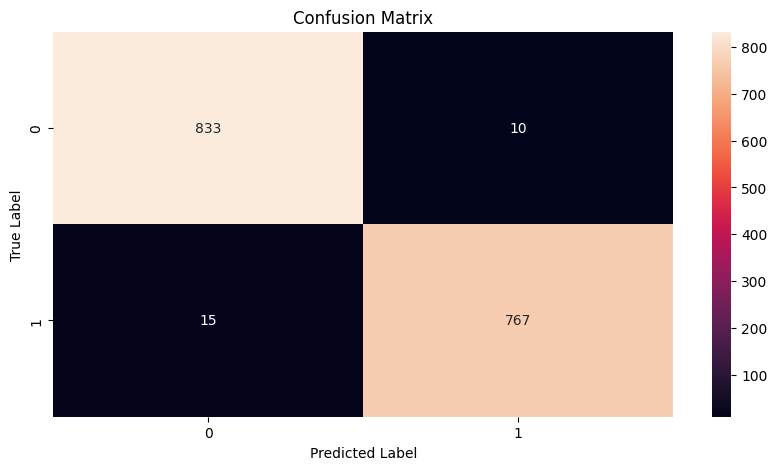

In [57]:
cm = confusion_matrix(y_test, y_pred1)

print('Confusion matrix\n\n', cm)
fig,ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt= '.0f',ax=ax)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Hasil klasifikasi menggunakan model Random Forest mencapai nilai akurasi yang cukup tinggi.
Untuk kelas edible:
- Precision sebesar 98%
- Recall sebesar 99%
- F1 sebesar 98%

Untuk kelas poisonous:
- Precision sebesar 98%
- Recall sebesar 99%
- F1 sebesar 98%

In [58]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       843
           1       0.99      0.98      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



## Neural Network

Hasil confusion matrix untuk NN dibawah menunjukkan
- TP: 742
- FP: 18
- TN: 825
- FN: 40

51/51 [==============================] - 0s 3ms/step


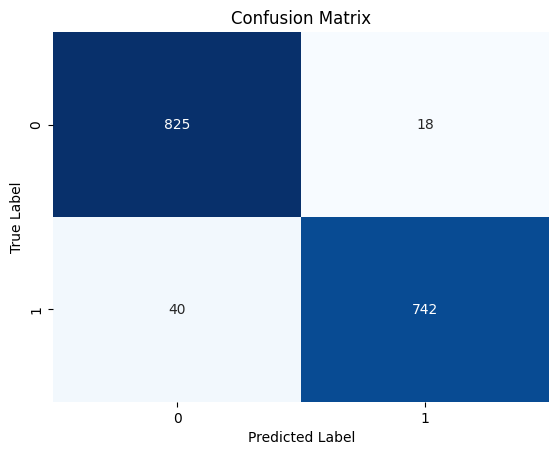

In [65]:
y_pred2 = (model.predict(X_test) > 0.5).astype("int32")
y_test2 = np.array(y_test)
cm2 = confusion_matrix(y_test2, y_pred2)

sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Hasil klasifikasi menggunakan model NN mencapai nilai akurasi yang cukup tinggi.
Untuk kelas edible:
- Precision sebesar 95%
- Recall sebesar 98%
- F1 sebesar 97%

Untuk kelas poisonous:
- Precision sebesar 98%
- Recall sebesar 95%
- F1 sebesar 96%

In [66]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       843
           1       0.98      0.95      0.96       782

    accuracy                           0.96      1625
   macro avg       0.97      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

